In [1]:
# logging 
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


In [2]:
# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_maze

maze = gym.make('Maze4-v0')
print("This is how maze looks like")
situation = maze.reset()
print(type(situation))
print(situation)
maze.render()

This is how maze looks like
<class 'tuple'>
('9', '1', '1', '1', '1', '0', '0', '0')

■ ■ ■ ■ ■ ■ ■ ■
■ □ □ ■ □ □ $ ■
■ ■ □ □ ■ □ A ■
■ ■ □ ■ □ □ ■ ■
■ □ □ □ □ □ □ ■
■ ■ □ ■ □ □ □ ■
■ □ □ □ □ ■ □ ■
■ ■ ■ ■ ■ ■ ■ ■


In [3]:
from lcs.agents.xncs import XNCS, Configuration

def cl_accuracy(cl, cfg):
     if cl.error < cfg.epsilon_0:
        return 1
     else:
        return cfg.alpha * pow(1/(cl.error * cfg.epsilon_0), cfg.v)
            
def fraction_accuracy(xncs):
    action_sets_percentages = []
    for action in range(xncs.cfg.number_of_actions):
        action_set = xncs.population.generate_action_set(action)
        total_accuracy = 0
        most_numerous = action_set[0]
        for cl in action_set:
            total_accuracy += cl_accuracy(cl, xncs.cfg)
            if cl.numerosity > most_numerous.numerosity:
                most_numerous = cl
        action_sets_percentages.append(cl_accuracy(most_numerous, xncs.cfg) / total_accuracy)
    return sum(action_sets_percentages) / xncs.cfg.number_of_actions

def specificity(xncs, population):
    total_specificity = 0
    for cl in population:
        total_specificity += pow(2, cl.wildcard_number)
    return total_specificity / xncs.population.numerosity

def xcs_maze_metrics(xncs: XNCS, environment):
    return {
        'numerosity': xncs.population.numerosity,
        'population': len(xncs.population),
        'average_specificity': specificity(xncs, xncs.population),
        'fraction_accuracy': fraction_accuracy(xncs)
    }

In [4]:
cfg = Configuration(number_of_actions=8,
                    max_population=1800,
                    learning_rate=0.2,
                    mutation_chance=0.08,
                    chi=0.8,
                    ga_threshold=25,
                    deletion_threshold=25,
                    delta=0.1,
                    initial_error=0.01,
                    metrics_trial_frequency=50,
                    covering_wildcard_chance = 0.9,
                    user_metrics_collector_fcn=xcs_maze_metrics,
                    lmc=10,
                    lem=200
                   )

In [5]:
agent = XNCS(cfg)
explore_population, explore_metrics = agent.explore(maze, 3000, True)

INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 50, 'reward': [3.9118060459067915e-40, 5.413860061862611e-40, 3.941142991792016e-40, 7.590377365199942e-40, 6.451506126985341e-40, 9.27574868531297e-40, 5.856242558182133e-40, 2.4552240398233183e-40], 'numerosity': 85, 'population': 79, 'average_specificity': 2.1882352941176473, 'fraction_accuracy': 0.11473214285714287}
INFO:lcs.agents.Agent:{'trial': 300, 'steps_in_trial': 41, 'reward': [22.892418689423998, 239.4080750982803, 23.420703111059797, 9.093514974797417, 10.558934437995042, 10.221880952919905, 8.903366641071203, 25.26348790733659], 'numerosity': 412, 'population': 215, 'average_specificity': 2.2305825242718447, 'fraction_accuracy': 0.09077187337373178}
INFO:lcs.agents.Agent:{'trial': 600, 'steps_in_trial': 27, 'reward': [209.2220281470372, 21.560651716609325, 4.235509403181219, 8.454916147061603, 6.489864561230982, 10.360795240832607, 8.746914468429338, 5.503112912076596], 'numerosity': 422, 'population': 215, 'average_spe

In [6]:
for cl in explore_population:
    print(str(cl))

Cond:0010000# - Act:0 - Num:1 [fit: 0.000, exp: 1547.00, pred: 693.150]
Cond:#0##000# - Act:1 - Num:3 [fit: 0.000, exp: 271.00, pred: 258.011]
Cond:#01##0#1 - Act:2 - Num:3 [fit: 0.000, exp: 127.00, pred: 126.896]
Cond:0#100#0# - Act:3 - Num:3 [fit: 0.000, exp: 59.00, pred: 182.235]
Cond:00100001 - Act:4 - Num:3 [fit: 0.000, exp: 150.00, pred: 146.540]
Cond:00#00#01 - Act:5 - Num:3 [fit: 0.000, exp: 147.00, pred: 151.349]
Cond:#0#00001 - Act:6 - Num:2 [fit: 0.000, exp: 77.00, pred: 153.266]
Cond:00100001 - Act:7 - Num:1 [fit: 0.000, exp: 100.00, pred: 149.196]
Cond:0#91001# - Act:0 - Num:3 [fit: 0.064, exp: 3.00, pred: 144.285]
Cond:09010010 - Act:1 - Num:1 [fit: 0.000, exp: 547.00, pred: 266.113]
Cond:0901001# - Act:2 - Num:1 [fit: 0.000, exp: 1988.00, pred: 353.646]
Cond:0#010010 - Act:3 - Num:3 [fit: 0.000, exp: 86.00, pred: 165.690]
Cond:09010010 - Act:4 - Num:1 [fit: 0.012, exp: 154.00, pred: 205.764]
Cond:0#010#1# - Act:5 - Num:2 [fit: 0.000, exp: 381.00, pred: 113.679]
Cond:#901

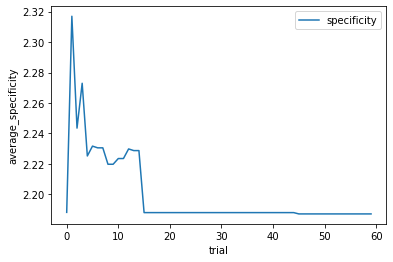

In [7]:
import pandas as pd
import numpy as np

df = pd.DataFrame(metric["average_specificity"] for metric in explore_metrics)
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("average_specificity")
ax.legend(["specificity"])


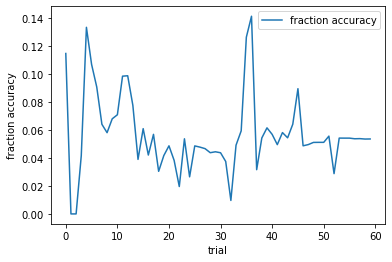

In [8]:
df = pd.DataFrame(metric["fraction_accuracy"] for metric in explore_metrics)
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("fraction accuracy")
ax.legend(["fraction accuracy"])


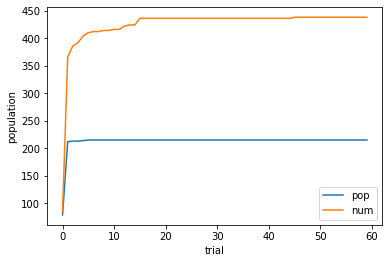

In [9]:

df = pd.DataFrame(zip([metric["population"] for metric in explore_metrics], [metric["numerosity"] for metric in explore_metrics]))
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["pop", "num"])

steps_averaged = []


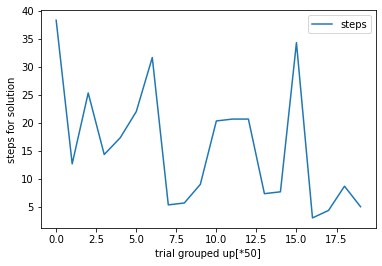

In [10]:


xf = [metric["steps_in_trial"] for metric in explore_metrics]
temp_df = np.array_split(xf, 20)
for i in range(len(temp_df)):
    temp_df[i] = np.mean(temp_df[i]) 
df = pd.DataFrame(temp_df)
# df = pd.DataFrame(metric["steps_in_trial"] for metric in explore_metrics)
ax = df.plot()
ax.set_xlabel("trial grouped up[*50]")
ax.set_ylabel("steps for solution")
ax.legend(["steps"])
